In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
standard_curve = df.from_csv("standard.csv").T
#standard_curve = standard_curve.iloc[2:]
stat_1 = standard_curve.describe()
mean_1 = stat_1.iloc[1]
std_1 = stat_1.iloc[2]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


<h1> Pomiar koncentracji białka metodą BCA </h1>
<p> szczegóły:
- maszyna: Denovix DS-11
- data: 15.01.19
- bufor rozcieńczający standar: RIPA + 1mM DTT
- standard: BSA
- proporcja roztworu WR A:B 50:1<p>
<h2>Wyniki pomiaru - Krzywa standardowa </h2>
sporządzenie krzywej zostało powtórzone 2 razy, korzystając z tych samych standardów rozcienczeń BSA

In [3]:
standard_curve

concentration ug/ml,7.8125,15.625,31.25,62.5,125.0,250.0,500.0,1000.0,2000.0
measurement1,-0.064,-0.005,-0.004,0.029,0.210,0.418,0.753,1.353,2.179
measurement2,0.091,-0.047,0.026,0.048,0.208,0.351,0.741,1.376,2.154
measurement3,-0.100,0.030,0.019,0.113,0.198,0.301,0.726,1.314,2.244
measurement4,-0.038,-0.083,0.029,0.094,0.138,0.386,0.715,1.307,2.165
measurement5,-0.025,-0.021,0.088,0.102,0.219,0.394,0.747,1.307,2.180


<h1> Statystyka wyników </h1>

In [4]:
stat_1

concentration ug/ml,7.8125,15.625,31.25,62.5,125.0,250.0,500.0,1000.0,2000.0
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.027200,-0.025200,0.031600,0.077200,0.194600,0.370000,0.736400,1.331400,2.184400
std,0.072019,0.042687,0.034078,0.036588,0.032508,0.045437,0.015614,0.031421,0.035004
min,-0.100000,-0.083000,-0.004000,0.029000,0.138000,0.301000,0.715000,1.307000,2.154000
25%,-0.064000,-0.047000,0.019000,0.048000,0.198000,0.351000,0.726000,1.307000,2.165000
50%,-0.038000,-0.021000,0.026000,0.094000,0.208000,0.386000,0.741000,1.314000,2.179000
75%,-0.025000,-0.005000,0.029000,0.102000,0.210000,0.394000,0.747000,1.353000,2.180000
max,0.091000,0.030000,0.088000,0.113000,0.219000,0.418000,0.753000,1.376000,2.244000


<h1> Wyniki przedstawione na wykresie </h1>

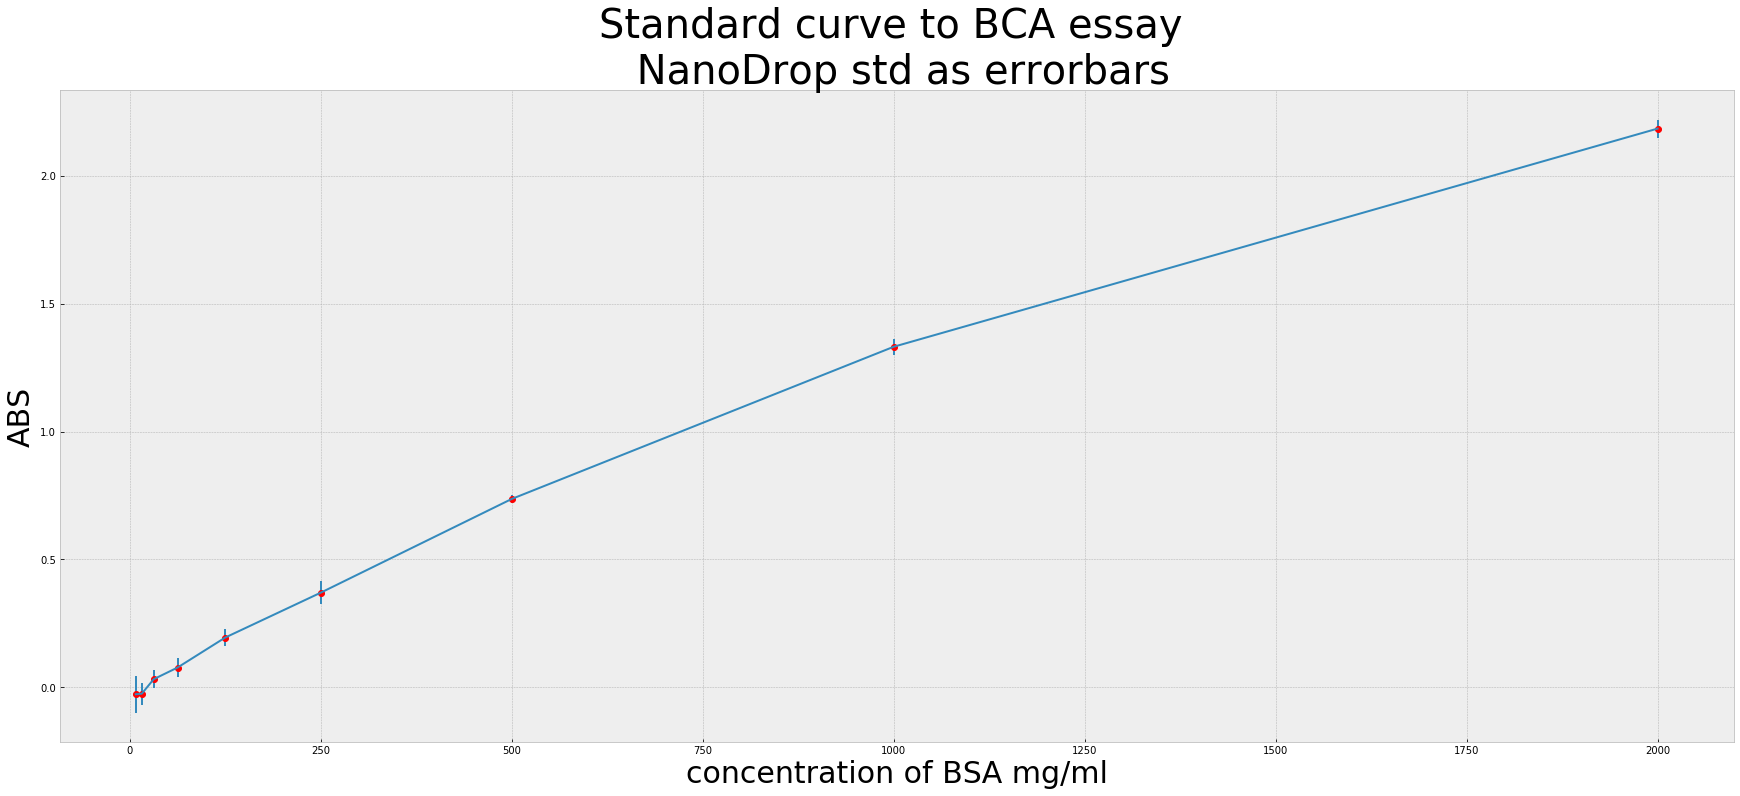

In [5]:
plt.figure(figsize=(30.0, 12.0))
plt.style.use("bmh")
plt.title("Standard curve to BCA essay \n NanoDrop std as errorbars", fontsize=40)
plt.plot(standard_curve.columns, mean_1, "ro")
plt.errorbar(standard_curve.columns, mean_1, yerr=standard_curve.std())
plt.xlabel("concentration of BSA mg/ml", fontsize=30)
plt.ylabel("ABS", fontsize=30)
plt.show()

<h2> odchylenia standardowe </h2>


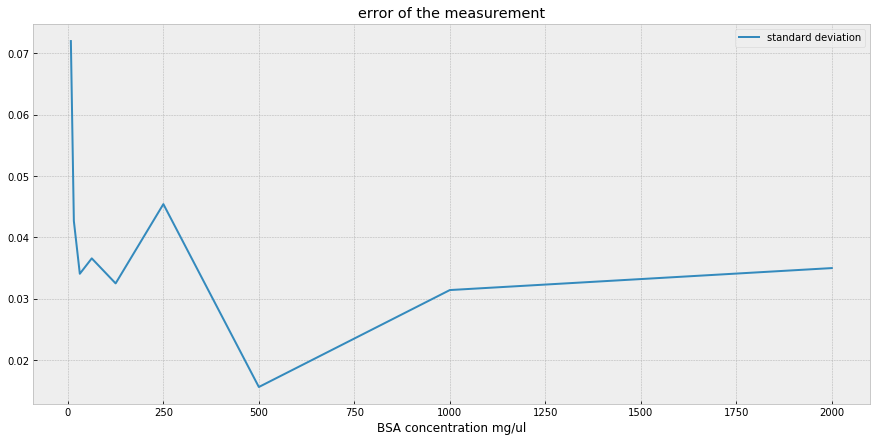

In [6]:
plt.figure(figsize=(15.0, 7.0))
plt.plot(stat_1.iloc[2], label="standard deviation")
#plt.plot(standard_curve.std(ddof=0), label="standard deviation of sample")
#plt.plot(standard_curve.sem(), label="Standard error of mean")
plt.xlabel("BSA concentration mg/ul")
plt.legend()
plt.title("error of the measurement")


# plt.savefig("error")

<h2> Interpretacja wyników</h2>

- najbardziej optymalne koncentracje białka dla tej metody pomiaru pomiędzy 125- 2000 mg/ml
- podczas rutynowych eksperymnetów do krzywej można użyć 6 punktów: 62.5, 125, 250, 500, 1000, 2000
- za pomocą std oraz mean najmniejszej koncentracji można wyznaczyć low detection limit dla metody
Obliczenie low - loe detection limit
LoD = LoB + 1.645 (SD low concentration sample)
- nie udało mi się zmierzyć lob za pomocą nanodopa ze względu na oprogramowanie, które na to nie pozwala, dlatego zakładam że lob=0. 
- średnia abs dla najniższej koncentracji + 1,64*sd dla tej koncentracji wyznacza lod, które wynosi w tym przypadku 0.111
<h5> po naniesieniu tej wartości na krzywą - wszystkie koncentracje poniżej 83.5 mg/ml(absorbancje poniżej 0.111) nie są rozróżnialne za pomocą tej metody </h5>

 <h5>-aby dało się porównać próbki pomiędzy sobą za pomocą tej metody nie mogą być rozcienczone 50x, ale np. 40x, ale wtedy należy zmienić stężenie DTT w standardach i zrobić nową krzywą. problemem może być DTT, którego większe stężenie spowoduje jeszcze wyższy detection limit dla metody</h5>


 <h1> Powtarzam sporządzenie krzywej dnia 21.01.19 </h1>

In [7]:
df = pd.DataFrame()
bca = df.from_csv("bca-standard-21-01-19.csv").T
stat = bca.describe()
mean = stat.iloc[1]
std = stat.iloc[2]
bca

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


concentration,15.125,31.25,62.5,125.0,250.0,500.0,1000.0,2000.0
Abs1,-0.013,-0.011,0.060,0.142,0.445,0.740,1.306,2.195
Abs2,-0.043,-0.050,0.045,0.187,0.300,0.670,1.291,1.906
Abs3,0.046,0.014,0.062,0.203,0.424,0.697,1.245,2.172
Abs4,0.003,0.034,0.103,0.162,0.323,0.676,NaN,NaN
Abs5,0.014,-0.043,0.095,NaN,0.346,0.696,NaN,NaN


In [8]:
stat

concentration,15.125,31.25,62.5,125.0,250.0,500.0,1000.0,2000.0
count,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000,3.000000
mean,0.001400,-0.011200,0.073000,0.173500,0.367600,0.695800,1.280667,2.091000
std,0.032898,0.036037,0.024789,0.026938,0.063634,0.027444,0.031786,0.160627
min,-0.043000,-0.050000,0.045000,0.142000,0.300000,0.670000,1.245000,1.906000
25%,-0.013000,-0.043000,0.060000,0.157000,0.323000,0.676000,1.268000,2.039000
50%,0.003000,-0.011000,0.062000,0.174500,0.346000,0.696000,1.291000,2.172000
75%,0.014000,0.014000,0.095000,0.191000,0.424000,0.697000,1.298500,2.183500
max,0.046000,0.034000,0.103000,0.203000,0.445000,0.740000,1.306000,2.195000


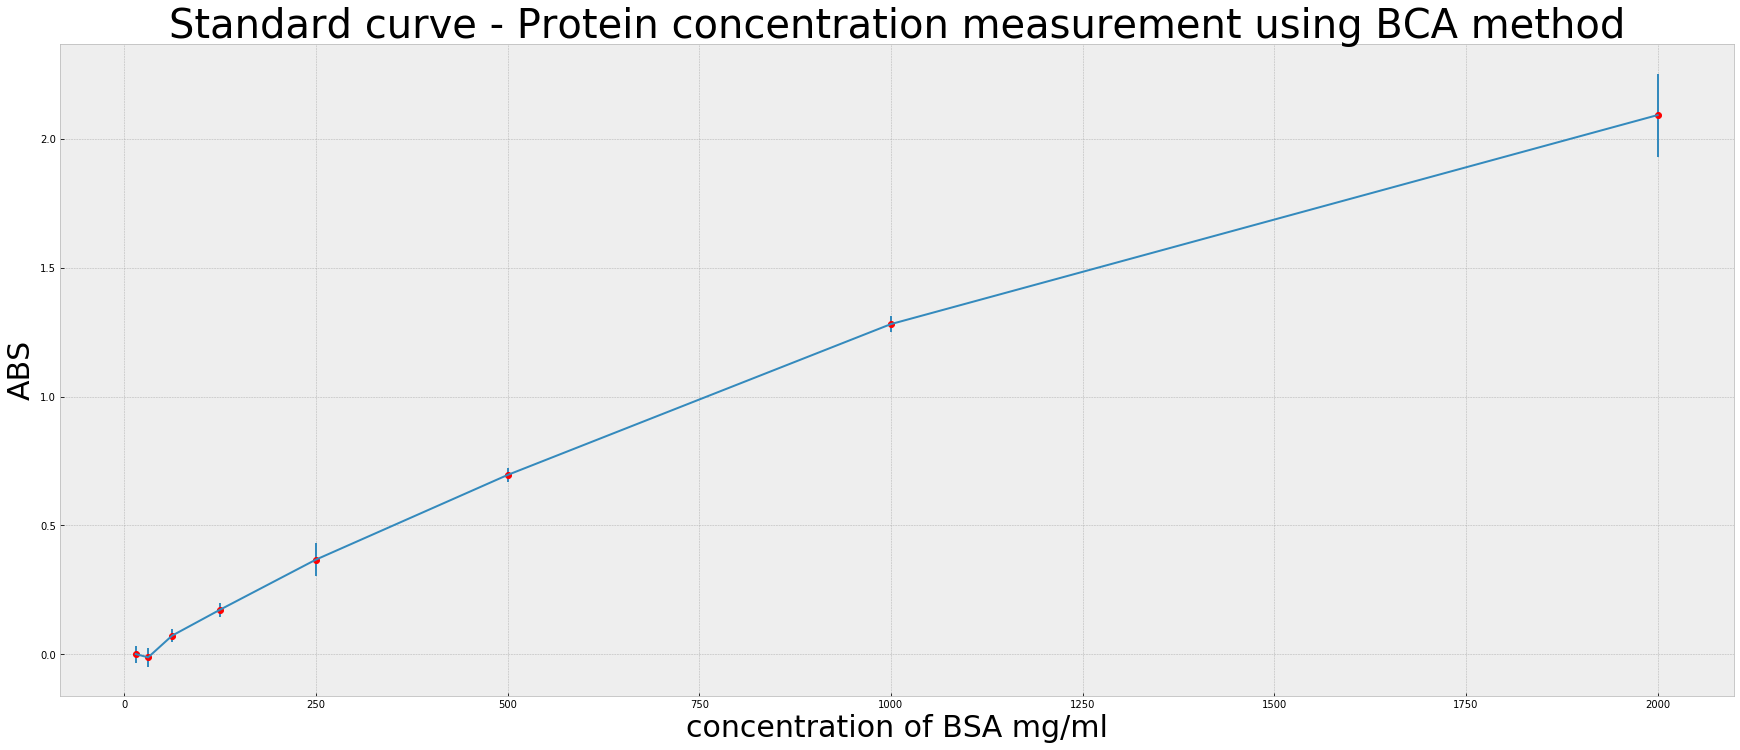

In [9]:

plt.figure(figsize=(30.0, 12.0))
plt.style.use("bmh")
plt.title("Standard curve - Protein concentration measurement using BCA method", fontsize=40)
plt.plot(bca.columns, mean, "ro")
plt.errorbar(bca.columns, mean, yerr=bca.std())
plt.xlabel("concentration of BSA mg/ml", fontsize=30)
plt.ylabel("ABS", fontsize=30)
plt.show()

Text(0.5, 1.0, 'error of the measurement calculated using 3 methods')

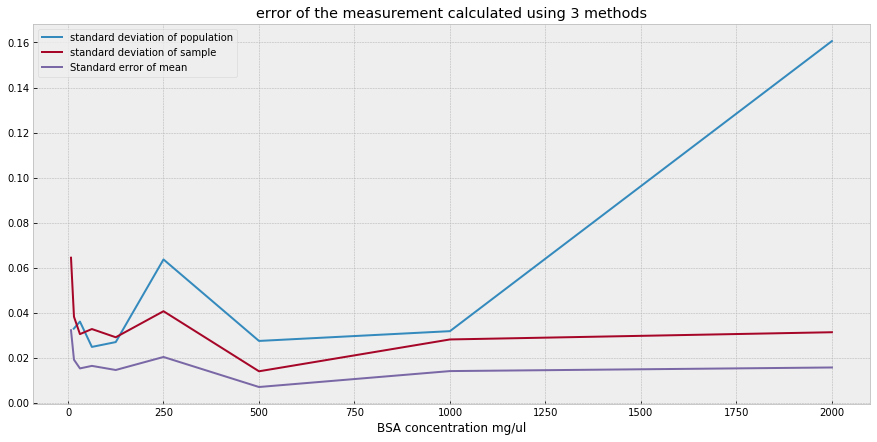

In [10]:
plt.figure(figsize=(15.0, 7.0))
plt.plot(stat.iloc[2], label="standard deviation of population")
plt.plot(standard_curve.std(ddof=0), label="standard deviation of sample")
plt.plot(standard_curve.sem(), label="Standard error of mean")
plt.xlabel("BSA concentration mg/ul")
plt.legend()
plt.title("error of the measurement calculated using 3 methods")

Text(0.5, 1.0, 'Error of the measurement')

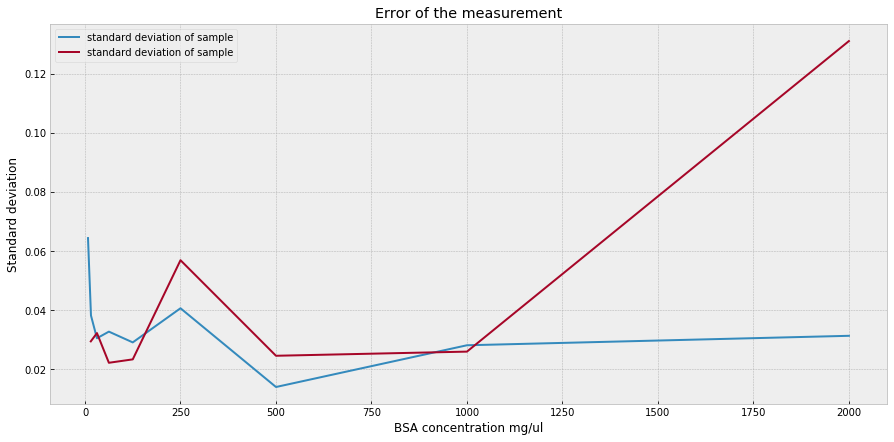

In [11]:
plt.figure(figsize=(15.0, 7.0))
plt.plot(standard_curve.std(ddof=0), label="standard deviation of sample")
plt.plot(bca.std(ddof=0), label="standard deviation of sample")
plt.xlabel("BSA concentration mg/ul")
plt.ylabel("Standard deviation")
plt.legend()
plt.title("Error of the measurement")

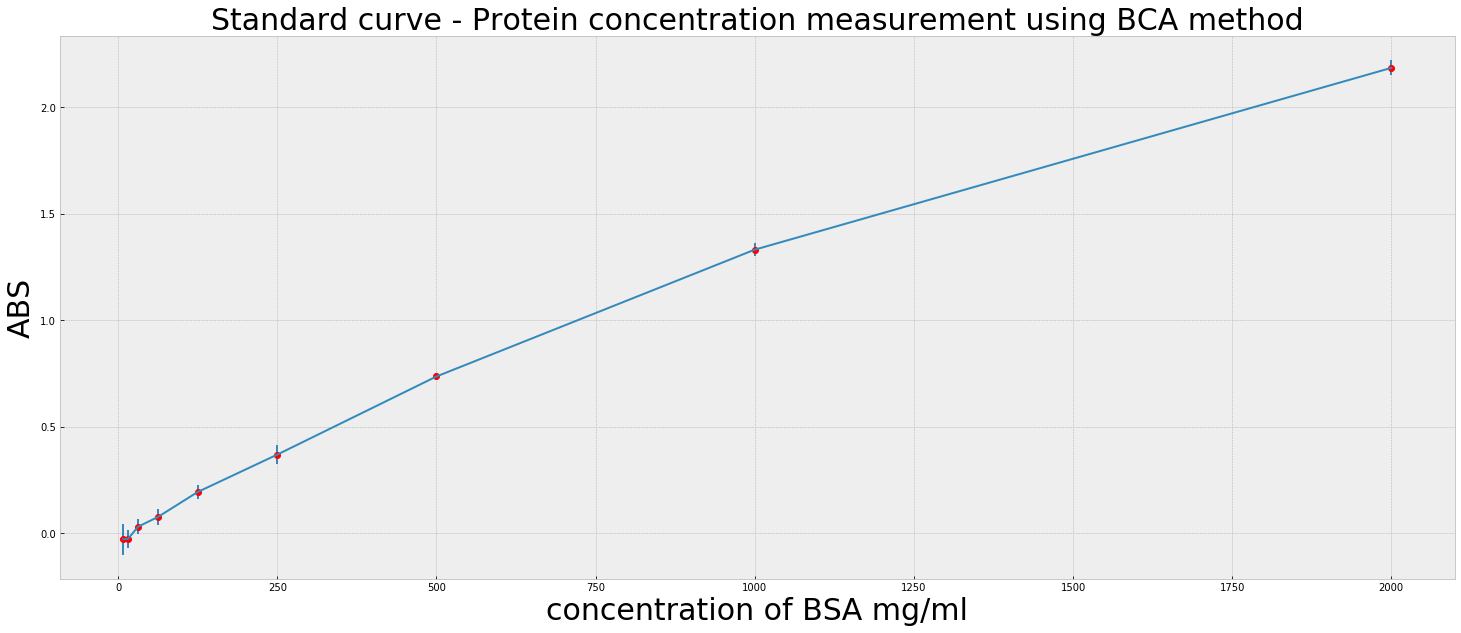

In [12]:

plt.figure(figsize=(25.0, 10.0))
plt.style.use("bmh")
plt.title("Standard curve - Protein concentration measurement using BCA method", fontsize=30)
#plt.plot(bca.columns, mean, "ro", label="curve from 17.01.19")
#plt.errorbar(bca.columns, mean, yerr=bca.std())
plt.plot(standard_curve.columns, mean_1, "ro")
plt.errorbar(standard_curve.columns, mean_1, yerr=standard_curve.std())

plt.xlabel("concentration of BSA mg/ml", fontsize=30)
plt.ylabel("ABS", fontsize=30)
#plt.savefig("bca-curve")
plt.show()

In [13]:
# https://www.onlineocr.net/ link - przerabia jpeg z nanodropa na tekst do csv

Detection limit dla drugiej krzywej (lod w poprzedniej próbie krzywej wynosił 0.111)
Obliczenie low - loe detection limit LoD = LoB + 1.645 (SD low concentration sample)
<p> średnia abs dla najniższej koncentracji: 0.001400 </p>
<p> odchylenie standardowe dla najniższej koncentracjix 1,64 = 0.032898* 1,64 = 0.05395271999999999 </p>
- lob = 0
- lod = 0.0539

